<h5 style="color:red">You don't have to run this part to do the clustering. All generated files are uploaded to Google Drive.</h5>
# Step 0: 
To cluster the restaurants, we plan to cluster the categories first. 
Word2vec was created by a team of researchers led by Tomas Mikolov at Google. Word2vec has a lot of advantages over former algorithms, such as Latent Semantic Analysis.
To train this model, download some data from: http://mattmahoney.net/dc/text8.zip.
# Word2vec

In [1]:
import word2vec
import os 
import json
import re
import numpy as np
word2vec.word2clusters('/Users/diedying/Downloads/text8', '/Users/diedying/Downloads/text8-clusters.txt', 10, verbose=True)
# text8 is an execution file downloaded from the sample of the word2vec link; it is used to trian the words; 
# word2clusters writes the file "text8-clusters.txt" with the clusters of words in the trainning doc;
# 10 is the number of clusters.
clusters = word2vec.load_clusters('/Users/diedying/Downloads/text8-clusters.txt')
# clusters is a WordClusters class object; the keys are the words; the values are the # of cluster that it belongs to.

Starting training using file /Users/diedying/Downloads/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.04%  Words/thread/sec: 277.20k  

# Cluster Example

In [4]:
print clusters['dog']

7


# Step 1: To get the list of all unique restaurants

In [86]:
path=os.getcwd()
user_id = []
business_id = []
index = 0
with open(path+'/training_at5.json') as f:
    for line in f:
        temp = json.loads(line)        
        business_id.append(temp["business_id"])
#training_at5 is the review file that has been filtered before.      
# This is without duplication: set
business_id = set(business_id)
# business_id is the list of all unique resaurants show up in trainning_at5.
outfile = open(path+'/out.json','w')
with open(path+'/yelp_academic_dataset_business.json') as f:
    for line in f:
        business = json.loads(line)["business_id"] 
        if business in business_id:
            outfile.write(line)
# out.json stores all the business ids of the restaurants we are interested in.


There are 255833 reviews to be analyed. There are 12726 unique restaurants in total.

# Step 2: Cluster the restaurants
According to the categories of restaurants, cluster them into 10 clusters.

In [11]:
def loadpr1():
    dicList={}
    for line in open(path+'/out.json'):
        bid=json.loads(line)['business_id']
        bcat=json.loads(line)['categories']
        dicList[bid]=bcat
    return dicList
wordscluster={}#number of words in clusters
dict1=loadpr1()
#dict1 is a dictionary, its keys are the business id, the values are the strings of categories.
categories={}#bid=>cate
cluster={}#bid=>cluster
with open('/Users/diedying/Downloads/text8-clusters.txt') as f:
    for line in f:
        (key,val)= line.split()
        wordscluster[key] = int(val)
# wordscluster is a dictionary, its keys are the words, the values are the # of cluster.
count=0
for busid in dict1:
    wordarray=[]
    clusterarray=[]
    arrays=dict1[busid]
    if arrays is None:
        count=count+1
        continue
    for words in arrays:
        add=re.findall('\w+',words)
        for word in add:
            word = word.lower()
            if (word not in wordarray and word in wordscluster):
                wordarray.append(word)
                clusterarray.append(wordscluster[word])
    categories[busid]=wordarray
    cluster[busid]=clusterarray
# categories is a dictionary, it keys are the business ids, its values are the unique words of its categories.
# cluster is a dictionary, it keys are the business ids, its values are the #s of clusters its categories belong to.
# print len(categories)
print len(cluster)
print cluster["2koVk44qPX7mV8irHO_e3A"]

12724
[5, 8, 8, 2]


There are two restaurants whose categories don't shown in any clusters. Ignore them.

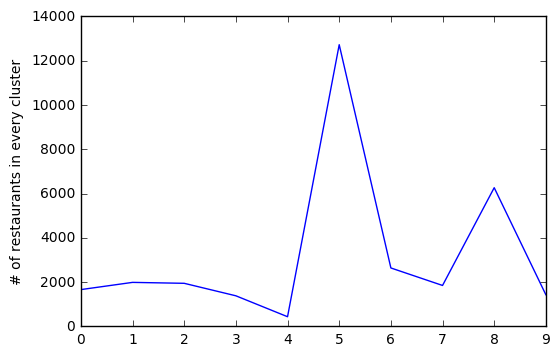

In [89]:
clustertores={}
for restid in cluster:
    clusternums=cluster[restid]
    for nums in clusternums:
        if (nums in clustertores) and (restid not in clustertores[nums]):
            clustertores[nums].append(restid)
        if nums not in clustertores:
            clustertores[nums]=[restid]  
# clustertores is a dictionary, its keys are #s of clusters, its values are the business ids of the restaurants that have the category belongs to the cluster.
import matplotlib.pyplot as plt
plt.plot([0,1, 2, 3, 4,5,6,7,8,9], [len(clustertores[0]),len(clustertores[1]),len(clustertores[2]),len(clustertores[3]),len(clustertores[4]),len(clustertores[5]),len(clustertores[6]),len(clustertores[7]),len(clustertores[8]),len(clustertores[9])])
plt.ylabel('# of restaurants in every cluster')
plt.show()
file_name = []
for i in range(0, len(clustertores)):
    cur = "cluster" + str(i)+".json"
    file_name.append(cur)
index = 0    
for clusternum in clustertores:
    reslist=clustertores[clusternum]
#     outfile = open(path+'/yelp_dataset_challenge_round9'+'/out.json','w')
    outfile = open(path+file_name[index],'w')
    with open(path+'/training_at5.json') as f:
        for line in f:
            business = json.loads(line)["business_id"] 
            if business in reslist:
                outfile.write(line)
    index += 1
# This ends up generating seperate json files of reviews corresponding to different clusters.
outfile = open(path+'cluster9.json','w')
with open(path+'/training_at5.json') as f:
    for line in f: 
        business = json.loads(line)["business_id"] 
        if business in reslist:
            outfile.write(line)

In [87]:
print len(categories)

12724


# Output Remark
The restaurants would be clustered into 10 clusters according to their categories. Same restaurants may accur in several clusters since their categories may have the same words. Accodring to the clustering of the restaurants, the corresponding reviews are written into 10 json files. They are used in the next steps. However, "restaurants" is in the #5 cluster. Since all business categories include the word "restaurants", #5 cluster  

In [85]:
print '|'+'cluster #'+'|'+' '+'                '+'business id'+'               |'
print '|'+'    '+'0'+'    '+'|'+' '+'restaurant1'+' '+'restaurant2'+'......'+' '+'restaurant9'+' '+'|'
print '|'+'    '+'0'+'    '+'|'+' '+'restaurant2'+' '+'restaurant5'+'.....'+' '+'restaurant15'+' '+'|'
print '|'+'    '+'0'+'    '+'|'+' '+'restaurant6'+' '+'restaurant10'+'....'+' '+'restaurant30'+' '+'|'
print '|'+' ........'+'|'+'...........................................|'
print '|'+' ........'+'|'+'...........................................|'
print '|'+' ........'+'|'+'...........................................|'
print '|'+' ........'+'|'+'...........................................|'
print '|'+'    '+'0'+'    '+'|'+' '+'restaurant10'+' '+'restaurant30'+'..'+' '+'restaurant100'+' '+'|'

|cluster #|                 business id               |
|    0    | restaurant1 restaurant2...... restaurant9 |
|    0    | restaurant2 restaurant5..... restaurant15 |
|    0    | restaurant6 restaurant10.... restaurant30 |
| ........|...........................................|
| ........|...........................................|
| ........|...........................................|
| ........|...........................................|
|    0    | restaurant10 restaurant30.. restaurant100 |


The result turns out to hava a large RSME. In comparision to the result before clustering, the RSME becomes worse. To analyze this, the possible reason is that in every cluster, since the amount of the restaurants is reduced. So we are facing the cold start problem.